**Prediction of Credit Card fraud:**

**Problem Statement:**

A credit card is one of the most used financial products to make online purchases and payments. Though the Credit cards can be a convenient way to manage your finances, they can also be risky. Credit card fraud is the unauthorized use of someone else's credit card or credit card information to make purchases or withdraw cash.

It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.
The dataset contains transactions made by credit cards in September 2013 by European cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

We have to build a classification model to predict whether a transaction is fraudulent or not.
Your focus in this project should be on the following:
The following is recommendation of the steps that should be employed towards attempting to solve this problem statement:

**Exploratory Data Analysis:** Analyze and understand the data to identify patterns, relationships, and trends in the data by using Descriptive Statistics and Visualizations.
Data Cleaning: This might include standardization, handling the missing values and outliers in the data.

**Dealing with Imbalanced data:** This data set is highly imbalanced. The data should be balanced using the appropriate methods before moving onto model building.
Feature Engineering: Create new features or transform the existing features for better performance of the ML Models.

**Model Selection:** Choose the most appropriate model that can be used for this project.
Model Training: Split the data into train & test sets and use the train set to estimate the best model parameters.

**Model Validation:** Evaluate the performance of the model on data that was not used during the training process. The goal is to estimate the model's ability to generalize to new, unseen data and to identify any issues with the model, such as overfitting.

**Model Deployment:** Model deployment is the process of making a trained machine learning model available for use in a production environment.


**Timeline **
We expect you to do your best and submit a solution within 2 weeks.



**Deliverables**

Please share the following deliverables in a zip file.

1.   A report (PDF) detailing: Description of design choices and Performance evaluation of the model
Discussion of future work
2.   The source code used to create the pipeline






**Tasks/Activities List**

Your code should contain the following activities/Analysis:

Exploratory Data Analysis (EDA) - Show the Data quality check, treat the missing values, outliers etc if any.
Get the correct datatype for date.
Balancing the data.

Feature Engineering and feature selection.

Train/Test Split - Apply a sampling distribution to find the best split.

Choose the metrics for the model evaluation and describe how they relate to the KPIs for the business (key performance indicators)

Model Selection, Training, Predicting and Assessment

Hyperparameter Tuning/Model Improvement

Model deployment plan.

Success Metrics
Below are the metrics for the successful submission of this case study.
The accuracy of the model on the test data set should be > 75% (Subjective in nature)
Add methods for Hyperparameter tuning.
Perform model validation.


Bonus Points
You can package your solution in a zip file included with a README that explains the installation and execution of the end-to-end pipeline.
You can demonstrate your documentation skills by describing how it benefits our company.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split


from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import make_scorer, f1_score
from sklearn.metrics import average_precision_score, matthews_corrcoef
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, roc_curve, auc

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint

from keras.models import Sequential
from keras.layers import InputLayer, Dense, BatchNormalization
from keras.models import load_model
from keras.wrappers.scikit_learn import KerasClassifier
from keras.callbacks import ModelCheckpoint








In [ ]:
pip install pipreqs

  Preparing metadata (setup.py) ... done
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13705 sha256=6373f63742b89109e3d4507e247a064459ab5812a0256220a87c240c49311829
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
Successfully built docopt


In [ ]:
!pip freeze > requirements.txt


In [ ]:
import sys

print("Python Version:", sys.version)



Python Version: 3.10.12 (main, Jun 11 2023, 05:26:28) [GCC 11.4.0]


In [ ]:
import tensorflow as tf
print(tf.__version__)


2.12.0


In [ ]:
import pandas as pd
print(pd.__version__)


1.5.3


In [ ]:
import numpy as np
print(np.__version__)


1.23.5


In [ ]:
import matplotlib
print(matplotlib.__version__)


3.7.1


In [ ]:
import sklearn
print(sklearn.__version__)


1.2.2


In [ ]:
import keras
print(keras.__version__)


2.12.0


In [ ]:
import imblearn
print(imblearn.__version__)


0.10.1


In [ ]:
import seaborn as sns
import xgboost as xgb

print(f"Seaborn version: {sns.__version__}")
print(f"XGBoost version: {xgb.__version__}")


Seaborn version: 0.12.2
XGBoost version: 1.7.6



**Custom functions for pipelining workflows**

In [ ]:
def Robust_Scaler_M(df,coloumns_to_scale):
    new_df = df.copy()
    rc = RobustScaler()
    for c in coloumns_to_scale:
      new_df[c]= rc.fit_transform(new_df[c].to_numpy().reshape(-1,1))

    return new_df

#coloumns_to_scale =['Time','Amount']
#Call this fucntion Robust_Scaler_M(df,coloumns_to_scale)

In [ ]:
def df_split(preprocessed_df):
    train, test, val =preprocessed_df[:240000], preprocessed_df[240000:262000], preprocessed_df[262000:]
    train['Class'].value_counts(), test['Class'].value_counts(), val['Class'].value_counts()
    train_np, test_np, val_np = train.to_numpy(), test.to_numpy(), val.to_numpy()
    train_np.shape, test_np.shape, val_np.shape
    x_train, y_train = train_np[:,:-1], train_np[:,-1]
    x_test, y_test = test_np[:,:-1], test_np[:,-1]
    x_val, y_val = val_np[:,:-1], val_np[:,-1]
    x_train.shape, y_train.shape, x_test.shape, y_test.shape, x_val.shape, y_val.shape
    print("Shapes:")
    print("X_train:", X_train.shape)
    print("X_temp:", X_temp.shape)
    print("y_train:", y_train.shape)
    print("y_temp:", y_temp.shape)
    print("X_test:", X_test.shape)
    print("X_val:", X_val.shape)
    print("y_test:", y_test.shape)
    print("y_val:", y_val.shape)
    return x_train.shape, y_train.shape, x_test.shape, y_test.shape, x_val.shape, y_val.shape


#Call this fucntion
#X_train, X_test, X_val, y_train, y_test, y_val_1 = df_split(new_df)

**Alternative way using train_test_split**


In [ ]:
def t_t_s_skl(preprocessed_df, train_test_size, val_size):
    X = preprocessed_df.drop(columns=['Class'])
    y = preprocessed_df['Class']

    X_train_1, X_temp_1, y_train_1, y_temp_1 = train_test_split(X, y, test_size=train_test_size, random_state=42)
    X_test_1, X_val_1, y_test_1, y_val_1 = train_test_split(X_temp_1, y_temp_1, test_size=val_size, random_state=42)

    print("Shapes:")
    print("X_train:", X_train_1.shape)
    print("X_temp:", X_temp_1.shape)
    print("y_train:", y_train_1.shape)
    print("y_temp:", y_temp_1.shape)
    print("X_test:", X_test_1.shape)
    print("X_val:", X_val_1.shape)
    print("y_test:", y_test_1.shape)
    print("y_val:", y_val_1.shape)

    return X_train_1, X_test_1, X_val_1, y_train_1, y_test_1, y_val_1

# Call this function
#X_train, X_test, X_val, y_train, y_test, y_val = t_t_s_skl(new_df, 0.2, 0.5)

Model training Functions

In [ ]:
def logistic_regression(X_train, y_train, X_test, y_test, X_val, y_val):
    l_m = LogisticRegression()
    l_m.fit(X_train, y_train)

    t_train_pred_l_m = l_m.predict(X_train)
    y_test_pred_l_m = l_m.predict(X_test)
    y_val_pred_l_m = l_m.predict(X_val)


    train_clf_report = classification_report(y_train, t_train_pred_l_m, target_names=['Not Fraud', 'Fraud'])
    test_clf_report = classification_report(y_test, y_test_pred_l_m, target_names=['Not Fraud', 'Fraud'])
    val_clf_report = classification_report(y_val, y_val_pred_l_m, target_names=['Not Fraud', 'Fraud'])

    print("Metrics for the train data:\n", train_clf_report)
    print("Metrics for the test data:\n", test_clf_report)
    print("Metrics for the validation data:\n", val_clf_report)

    return l_m

# Call this function with the appropriate data
#l_m = logistic_regression(X_train, y_train, X_test, y_test, X_val, y_val)

In [ ]:

def neural_net(X_train, y_train, X_val, y_val):

    shallow_nn = Sequential()
    shallow_nn.add(InputLayer((X_train.shape[1],)))
    shallow_nn.add(Dense(2, activation='relu'))
    shallow_nn.add(BatchNormalization())
    shallow_nn.add(Dense(1, activation='sigmoid'))

    shallow_nn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    checkpoint = ModelCheckpoint('shallow_nn', save_best_only=True)

    summary = shallow_nn.summary()
    summary
    num_epochs = int(input("Enter the number of epochs: "))
    shallow_model = shallow_nn.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=num_epochs, callbacks=[checkpoint])
    return summary, shallow_nn
#Call this Function by # summary, shallow_nn_model= neural_net(X_train, y_train, X_val, y_val

In [ ]:
def random_forest(max_depth, n_jobs, X_train, y_train, X_val, y_val):
    rf = RandomForestClassifier(max_depth=max_depth, n_jobs=n_jobs)
    rf.fit(X_train, y_train)

    y_val_pred = rf.predict(X_val)
    print("Classification Report for Validation Data:")
    print(classification_report(y_val, y_val_pred, target_names=['Not Fraud', 'Fraud']))

    return rf
#Call this fucntion by # rf_model = random_forest(50,-1,X_train,y_train)

In [ ]:

def G_B_C(n_estimators,learning_rate, max_depth, X_train, y_train):
    gbc = GradientBoostingClassifier(n_estimators=n_estimators, learning_rate=learning_rate, max_depth=1, random_state=0)
    gbc.fit(X_train, y_train)
    print(classification_report(y_val, gbc.predict(X_val), target_names=['Not Fraud', 'Fraud']))
    return gbc

# Call this fucntion by # g_b_c_model = G_B_C(50,1.0, 1, X_train, y_train)

In [ ]:
def S_V_C(X_train,y_train):
    svc = LinearSVC(class_weight='balanced')
    svc.fit(X_train, y_train)
    print(classification_report(y_val, svc.predict(X_val), target_names=['Not Fraud', 'Fraud']))
    return svc

#Call this fucntion by # S_V_C_model = S_V_C(X_train,y_train)

*Confusion matrix*

In [ ]:

def C_M_val(y_val, y_val_pred_l_m):
    # Assuming you have y_true and y_pred defined
    cm = confusion_matrix(y_val, y_val_pred_l_m)

    # Plot Confusion Matrix as Heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix for the validation set')
    plt.show()
# Call this function by C_M_val(y_val, y_val_pred)

*ROC Curve*

In [ ]:
def plot_ROC_C(y_val, y_val_pred_prob_l_m):
    # Plot ROC Curve
    fpr, tpr, thresholds = roc_curve(y_val, y_val_pred_prob_l_m)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()
#Call this function by: plot_ROC_C(y_val, y_val_pred_prob_l_m)

*Predict using different models*

In [ ]:

def predict_m(model, X_train):
    predicted_class = (model.predict(X_train).flatten() > 0.5).astype(int)

    return (model.predict(X_train).flatten() > 0.5).astype(int)

#Call  this function by # predict_m(shallow_nn, X_train)

models = ['shallow_nn_model','l_m','rf_model','g_b_c_model','S_V_C_model']

**Balance dataframe with 50% of each classes**

In [ ]:
def dataframe_b(unbalanced_df):
    not_frauds = new_df.query('Class == 0')
    frauds = new_df.query('Class == 1')
    not_frauds['Class'].value_counts(), frauds['Class'].value_counts()
    balanced_dataframe= unbalanced_df.sample(len(frauds), random_state=33)
    balanced_dataframe = unbalanced_df.sample(frac=1, random_state=1)
    return balanced_dataframe

# Call this fucntion by balanced_dataframe = dataframe_b(new_df)

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')


Mounted at /content/drive/


In [ ]:
!unzip /content/drive/MyDrive/CApstone_Project/Credit_Card_Fraud.zip


Archive:  /content/drive/MyDrive/CApstone_Project/Credit_Card_Fraud.zip
 extracting: Credit_Card_Fraud/Credit_Card_Fraud_ProblemStatement.docx  
 extracting: Credit_Card_Fraud/creditcard.csv  


In [ ]:
df = pd.read_csv('/content/Credit_Card_Fraud/creditcard.csv')
df


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [ ]:
df['Class'].value_counts()


0    284315
1       492
Name: Class, dtype: int64

In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


<Axes: >

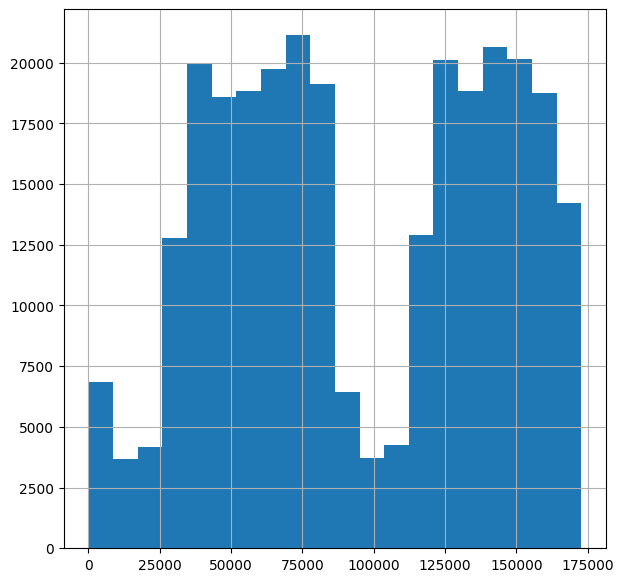

In [ ]:
df['Time'].hist(bins=20, figsize=(7,7))


<Axes: >

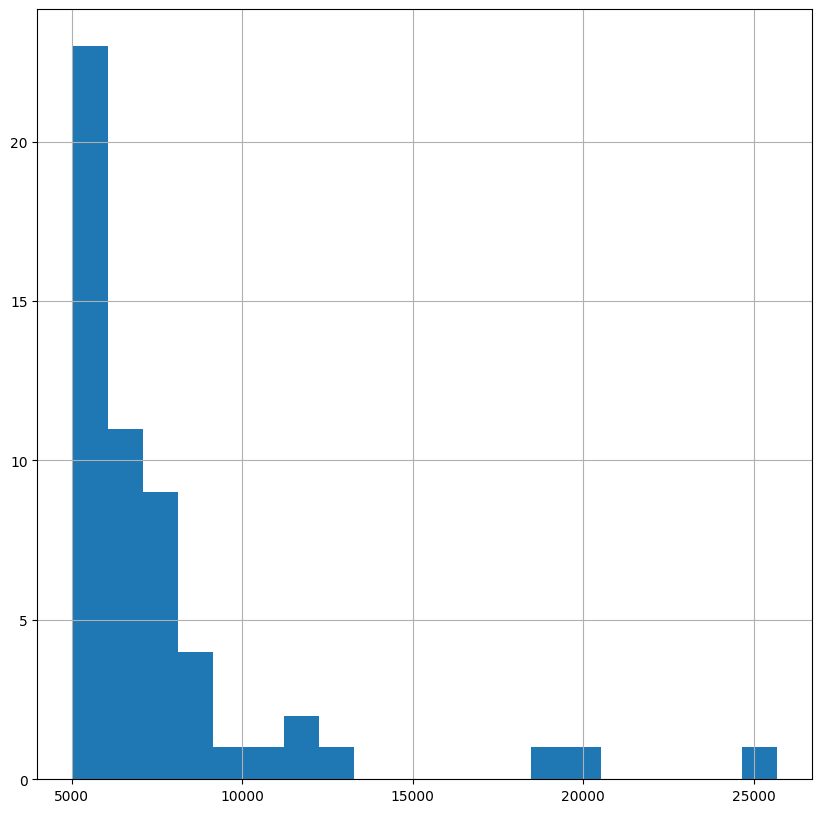

In [ ]:
new_df = df.copy()
new_df['Amount'][(new_df['Amount']>5000)].hist(bins=20, figsize=(10,10))


In [ ]:
new_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,0.118914,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,0.927124,0.001727
std,0.557903,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,3.495006,0.041527
min,-0.994983,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,-0.307413,0.000000
25%,-0.358210,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,-0.229162,0.000000
50%,0.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,0.000000,0.000000
75%,0.641790,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,0.770838,0.000000
max,1.035022,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,358.683155,1.000000


In [ ]:
df['Time'][(df['Time']>172790)]

In [ ]:
df['Class'].unique()


array([0, 1])

In [ ]:
df['Amount'].dtypes

dtype('float64')

**WORKFLOW**

**Pre-Processing**

In [ ]:
coloumns_to_scale =['Time','Amount']
new_df =Robust_Scaler_M(df,coloumns_to_scale)

**data spliting for the model traing and testing**

In [ ]:
X_train, X_test, X_val, y_train, y_test, y_val = t_t_s_skl(new_df, 0.2, 0.5)

Shapes:
X_train: (227845, 30)
X_temp: (56962, 30)
y_train: (227845,)
y_temp: (56962,)
X_test: (28481, 30)
X_val: (28481, 30)
y_test: (28481,)
y_val: (28481,)


**Training with different models to find the model with highest f1-score**

In [ ]:
#y_test_pred,y_test_pred_score, y_val_pred, y_val_pred_score = logistic_regression(X_train, y_train)

In [ ]:
l_m= logistic_regression(X_train, y_train, X_test, y_test, X_val, y_val)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Metrics for the train data:
               precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00    227451
       Fraud       0.90      0.63      0.74       394

    accuracy                           1.00    227845
   macro avg       0.95      0.81      0.87    227845
weighted avg       1.00      1.00      1.00    227845

Metrics for the test data:
               precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     28426
       Fraud       0.84      0.58      0.69        55

    accuracy                           1.00     28481
   macro avg       0.92      0.79      0.84     28481
weighted avg       1.00      1.00      1.00     28481

Metrics for the validation data:
               precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     28438
       Fraud       0.89      0.58      0.70        43

    accuracy                           1.00     28481
   macro avg       0.95      0.79    

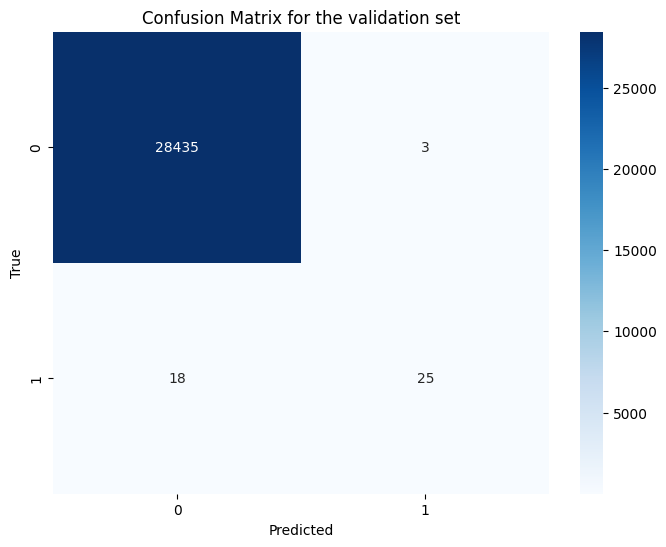

In [ ]:
C_M_val(y_val, l_m.predict(X_val).flatten().astype(int))

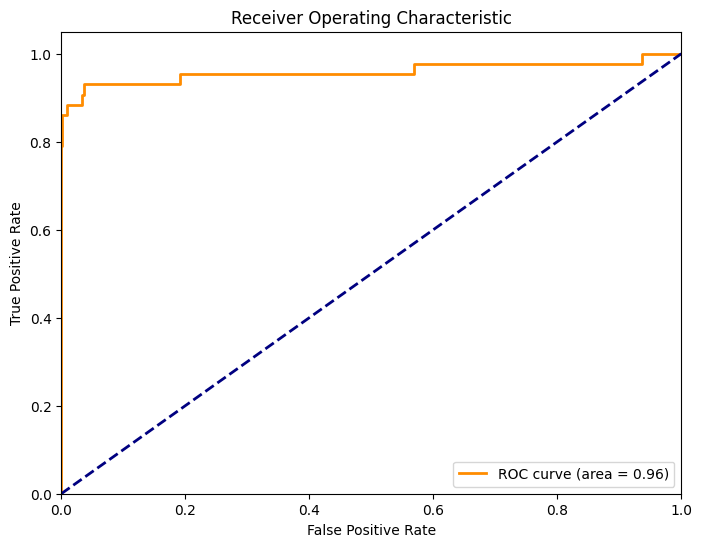

In [ ]:
plot_ROC_C(y_val,y_val_pred_prob_l_m = l_m.predict_proba(X_val)[:, 1])

In [ ]:
new_df


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,1.783274,0
1,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.269825,0
2,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,4.983721,0
3,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,1.418291,0
4,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.670579,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,1.034951,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,-0.296653,0
284803,1.034963,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,0.038986,0
284804,1.034975,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,0.641096,0
284805,1.034975,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,-0.167680,0


Tensorflow, Neural network

In [ ]:
summary, shallow_nn_model= neural_net(X_train, y_train, X_val, y_val)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 2)                 62        
                                                                 
 batch_normalization_3 (Batc  (None, 2)                8         
 hNormalization)                                                 
                                                                 
 dense_7 (Dense)             (None, 1)                 3         
                                                                 
Total params: 73
Trainable params: 69
Non-trainable params: 4
_________________________________________________________________
Enter the number of epochs: 5
Epoch 1/5
7119/7121 [============================>.] - ETA: 0s - loss: 0.0642 - accuracy: 0.9856

7121/7121 [==============================] - 27s 4ms/step - loss: 0.0642 - accuracy: 0.9856 - val_loss: 0.0100 - val_accuracy: 0.9985
Epoch 2/5
7111/7121 [============================>.] - ETA: 0s - loss: 0.0071 - accuracy: 0.9984

7121/7121 [==============================] - 30s 4ms/step - loss: 0.0071 - accuracy: 0.9984 - val_loss: 0.0059 - val_accuracy: 0.9990
Epoch 3/5
7115/7121 [============================>.] - ETA: 0s - loss: 0.0044 - accuracy: 0.9990

7121/7121 [==============================] - 36s 5ms/step - loss: 0.0043 - accuracy: 0.9990 - val_loss: 0.0046 - val_accuracy: 0.9993
Epoch 4/5
7121/7121 [==============================] - 33s 5ms/step - loss: 0.0039 - accuracy: 0.9992 - val_loss: 0.0050 - val_accuracy: 0.9992
Epoch 5/5
7121/7121 [==============================] - 24s 3ms/step - loss: 0.0036 - accuracy: 0.9993 - val_loss: 0.0048 - val_accuracy: 0.9992


In [ ]:
print(classification_report(y_val, predict_m(shallow_nn_model, X_val), target_names=['Not Fraud','Fraud']))

891/891 [==============================] - 2s 2ms/step
              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     28438
       Fraud       0.85      0.79      0.82        43

    accuracy                           1.00     28481
   macro avg       0.92      0.90      0.91     28481
weighted avg       1.00      1.00      1.00     28481



891/891 [==============================] - 1s 1ms/step


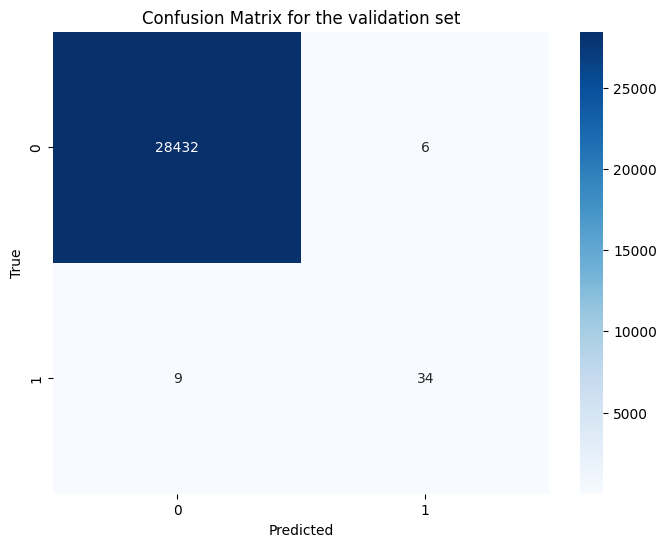

In [ ]:
C_M_val(y_val, predict_m(shallow_nn_model, X_val))

*Get the prediction probability using "shallow_nn_model.predict(X_val).flatten().astype(float)"*

891/891 [==============================] - 2s 2ms/step


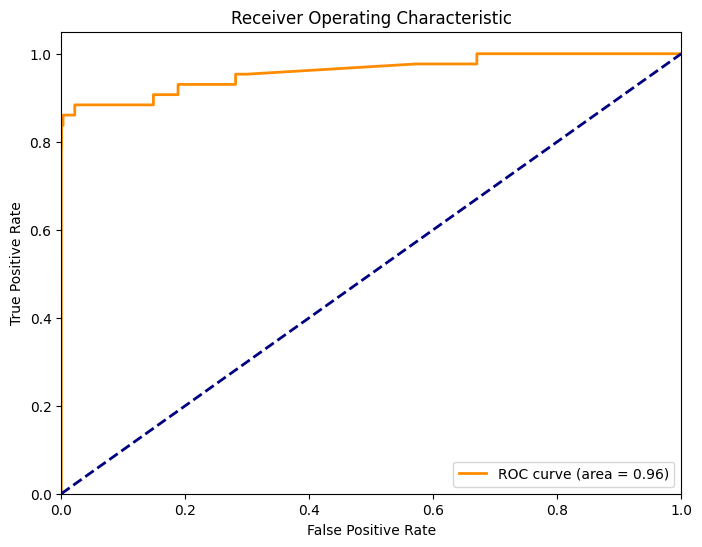

In [ ]:
plot_ROC_C(y_val, shallow_nn_model.predict(X_val).flatten().astype(float))

*RandomForestClassifier*

In [ ]:
rf_model = random_forest(50,-1,X_train, y_train, X_val, y_val)


Classification Report for Validation Data:
              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     28438
       Fraud       0.94      0.79      0.86        43

    accuracy                           1.00     28481
   macro avg       0.97      0.90      0.93     28481
weighted avg       1.00      1.00      1.00     28481



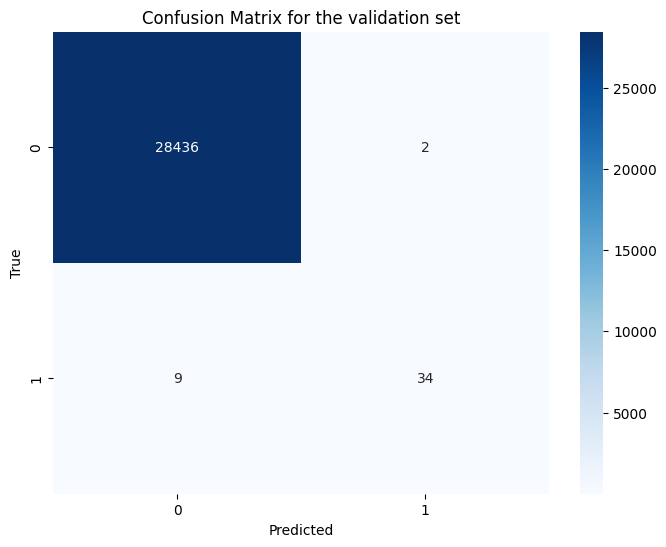

In [ ]:
C_M_val(y_val, predict_m(rf_model, X_val))

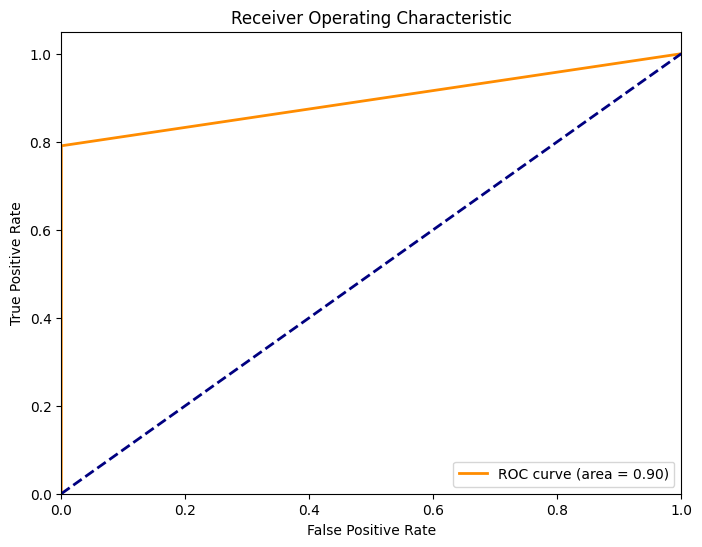

In [ ]:
plot_ROC_C(y_val, rf_model.predict(X_val).flatten().astype(float))

*GradientBoostingClassifier*

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier


In [ ]:
g_b_c_model= G_B_C(50,1.0, 1, X_train, y_train)



              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     28438
       Fraud       0.68      0.70      0.69        43

    accuracy                           1.00     28481
   macro avg       0.84      0.85      0.84     28481
weighted avg       1.00      1.00      1.00     28481



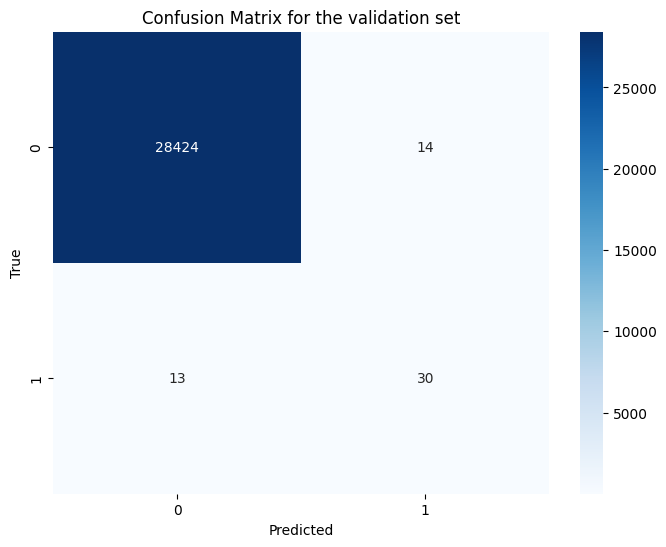

In [ ]:
C_M_val(y_val,predict_m(g_b_c_model, X_val))

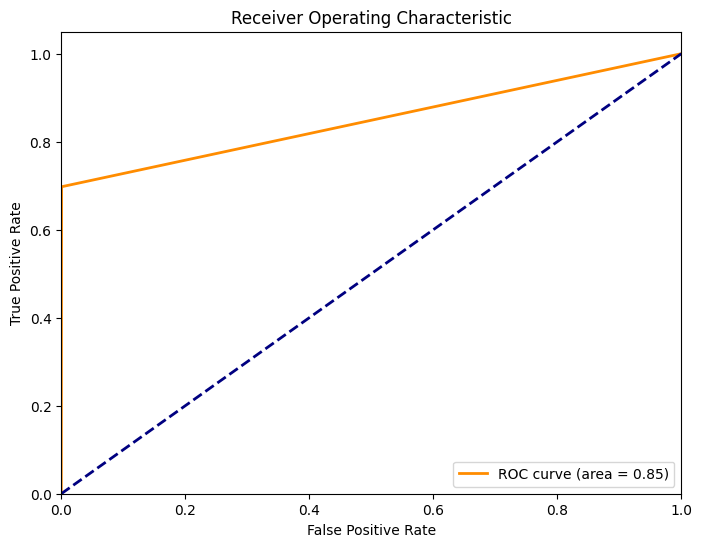

In [ ]:
plot_ROC_C(y_val, g_b_c_model.predict(X_val).flatten().astype(float))

*LinearSVC*

In [ ]:
S_V_C_model = S_V_C(X_train,y_train)


              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     28438
       Fraud       0.72      0.67      0.70        43

    accuracy                           1.00     28481
   macro avg       0.86      0.84      0.85     28481
weighted avg       1.00      1.00      1.00     28481



/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


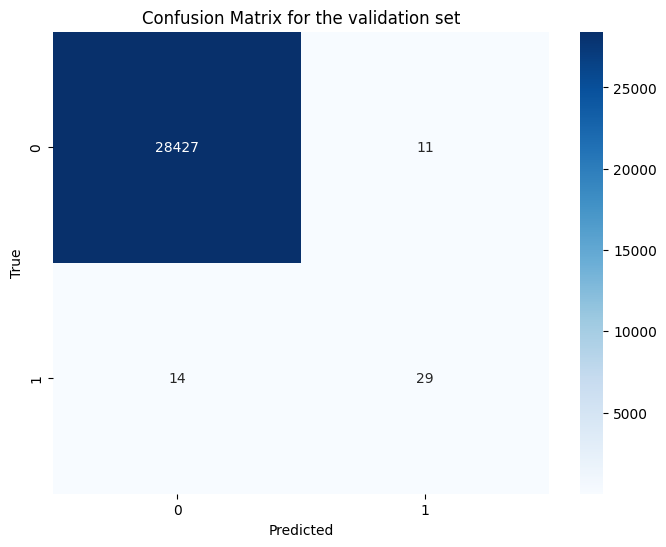

In [ ]:
C_M_val(y_val,predict_m(S_V_C_model, X_val))

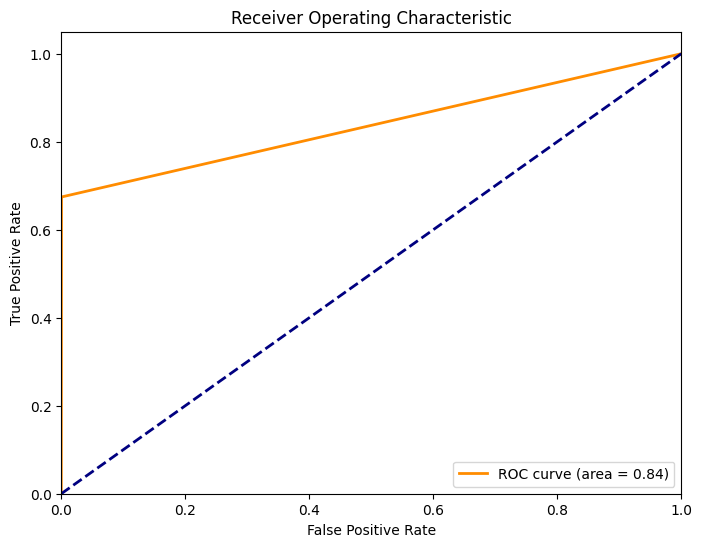

In [ ]:
plot_ROC_C(y_val, S_V_C_model.predict(X_val).flatten().astype(float))



**Balanced Dataframe on previous models**

In [ ]:
def dataframe_b(unbalanced_df):

    not_frauds = unbalanced_df.query('Class == 0')
    frauds = unbalanced_df.query('Class == 1')
    not_frauds_b = not_frauds.sample(len(frauds), random_state=33)
    balanced_dataframe = pd.concat([not_frauds_b, frauds], ignore_index=True)
    balanced_dataframe = balanced_dataframe.sample(frac=1, random_state=1)

    return balanced_dataframe

# Call this fucntion by balanced_dataframe = dataframe_b(new_df)

In [ ]:
balanced_df = dataframe_b(new_df)


In [ ]:
balanced_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
953,0.832364,1.868226,1.363077,-1.994934,4.173516,1.239751,-0.746186,0.572731,-0.131235,-1.551839,...,-0.301001,-0.818972,0.206812,-0.263683,-0.114958,-0.240672,-0.006629,0.017258,-0.263537,1
236,-0.648104,-0.541704,0.894774,1.412763,1.071169,-0.031391,0.130057,0.703418,0.179867,-0.873971,...,0.273087,0.843726,0.002048,0.234202,-0.237487,-0.203136,0.403987,0.209808,0.684553,0
484,0.939250,0.397778,0.739553,0.251486,0.950597,0.098722,-0.371977,0.583818,-0.207413,-0.078101,...,-0.144620,-0.055938,0.251418,-0.004415,-1.828708,0.398649,0.216721,0.103524,-0.269825,0
799,0.107931,-13.086519,7.352148,-18.256576,10.648505,-11.731476,-3.659167,-14.873658,8.810473,-5.418204,...,2.761157,-0.266162,-0.412861,0.519952,-0.743909,-0.167808,-2.498300,-0.711066,0.116118,1
723,-0.191908,1.232604,-0.548931,1.087873,0.894082,-1.433055,-0.356797,-0.717492,0.003167,-0.100397,...,-0.448671,-0.517568,0.012833,0.699217,0.527258,-0.322607,0.080805,0.035427,-0.033676,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
767,0.006967,-6.713407,3.921104,-9.746678,5.148263,-5.151563,-2.099389,-5.937767,3.578780,-4.684952,...,0.954272,-0.451086,0.127214,-0.339450,0.394096,1.075295,1.649906,-0.394905,3.226717,1
72,-0.313068,-0.777160,1.142580,-0.513594,0.185455,2.217024,3.786366,-0.272978,1.361702,-0.515267,...,-0.064448,-0.157776,-0.135844,1.012926,0.159351,-0.246155,0.162232,0.130877,-0.260602,0
908,0.706622,-6.423306,1.658515,-5.866440,2.052064,-0.615817,-3.372266,-5.036556,2.643106,-2.274630,...,0.641211,-0.256678,-2.337233,-0.158278,1.198797,-0.261258,0.780125,-0.731801,-0.307413,1
235,0.437423,2.034022,-0.760072,-1.535782,-0.575433,-0.194520,-0.506393,-0.183402,-0.152131,1.753376,...,0.222921,0.946948,-0.137158,0.602851,0.356182,1.046368,-0.085639,-0.069896,0.321386,0


In [ ]:
balanced_df.shape

(984, 31)

In [ ]:
X_train_b, X_test_b, X_val_b, y_train_b, y_test_b, y_val_b = t_t_s_skl(balanced_df, 0.2, 0.5)

Shapes:
X_train: (787, 30)
X_temp: (197, 30)
y_train: (787,)
y_temp: (197,)
X_test: (98, 30)
X_val: (99, 30)
y_test: (98,)
y_val: (99,)


***Another method to balance the dataset using SMOTE (Synthetic Minority Over-sampling Technique) , ***

In [ ]:
'''from imblearn.over_sampling import SMOTE
from sklearn.metrics import average_precision_score, matthews_corrcoef
X_train_smote, X_test_smote, X_val_smote, y_train_smote, y_test_smote, y_val_smote = t_t_s_skl(new_df, 0.2, 0.5)
smote = SMOTE(sampling_strategy=0.5, random_state=42)
X_train_smote_resampled, y_train_smote_resampled = smote.fit_resample(X_train_smote, y_train_smote)
X_train_smote_resampled.shape, y_train_smote_resampled.shape
X_train_smote.shape, X_test_smote.shape, X_val_smote.shape, y_train_smote.shape, y_test_smote.shape, y_val_smote.shape
y_train_smote_resampled.value_counts().plot(kind='bar')
plt.xlabel('Classes')
plt.ylabel('Count')
plt.show()

summary, shallow_nn_model_b_SMOTE= neural_net(X_train_smote_resampled, y_train_smote_resampled, X_val_smote, y_val_smote)
print(classification_report(y_val_smote, shallow_nn_model_b_SMOTE.predict(X_val_smote).astype(int), target_names= ['Not Fraud','Fraud']))
C_M_val(y_val,predict_m(shallow_nn_model_b_SMOTE, X_val))


#threshold = 0.3  # Adjust this threshold as needed
#y_test_pred_SMOTE_classes = (NN_Smote_p > threshold).astype(int)


# shallow_nn_model_b_SMOTE.predict(X_val_smote).astype(float) will contain predicted probabilities for the "Fraud" class
auc_pr = average_precision_score(y_val_smote, shallow_nn_model_b_SMOTE.predict(X_val_smote).astype(float))
print("AUC-PR:", auc_pr)

'''

*LogisticRegression*

In [ ]:
l_m_b, y_val_pred_b, y_val_pred_prob_b, fpr_b, tpr_b, thresholds_b, roc_auc_b = logistic_regression(X_train_b, y_train_b, X_test_b, y_test_b, X_val_b, y_val_b)


Metrics for the train data:
               precision    recall  f1-score   support

   Not Fraud       0.93      0.98      0.95       394
       Fraud       0.98      0.92      0.95       393

    accuracy                           0.95       787
   macro avg       0.95      0.95      0.95       787
weighted avg       0.95      0.95      0.95       787

Metrics for the test data:
               precision    recall  f1-score   support

   Not Fraud       0.93      0.98      0.95        53
       Fraud       0.98      0.91      0.94        45

    accuracy                           0.95        98
   macro avg       0.95      0.95      0.95        98
weighted avg       0.95      0.95      0.95        98

Metrics for the validation data:
               precision    recall  f1-score   support

   Not Fraud       0.94      1.00      0.97        45
       Fraud       1.00      0.94      0.97        54

    accuracy                           0.97        99
   macro avg       0.97      0.97    

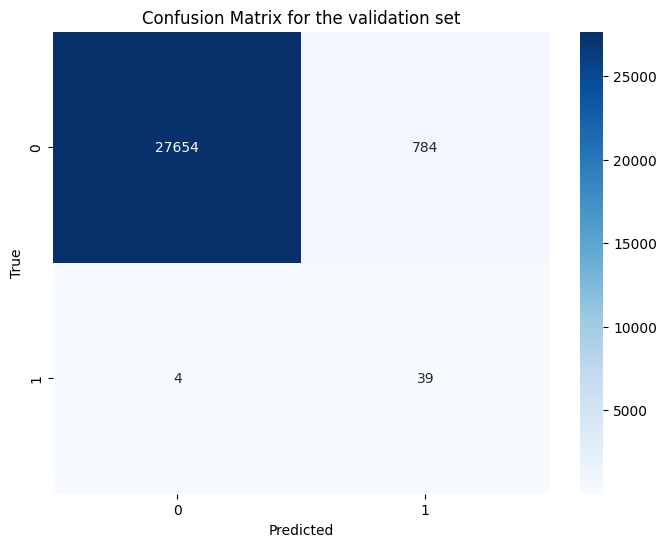

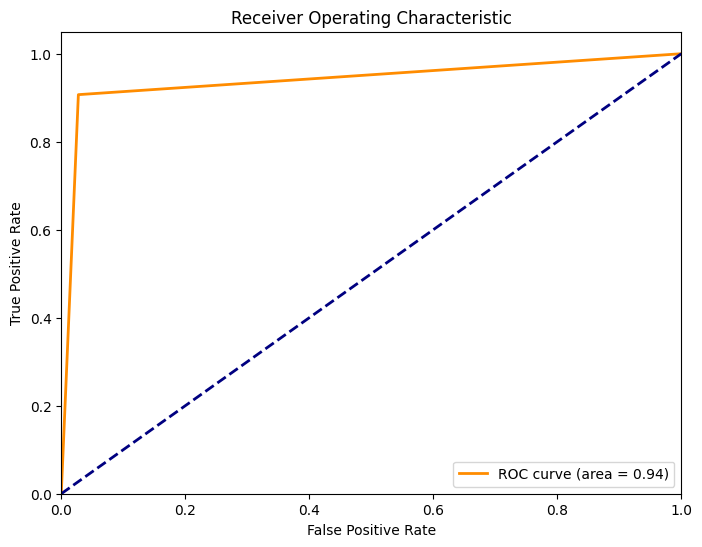

In [ ]:
C_M_val(y_val,predict_m(l_m_b, X_val))
plot_ROC_C(y_val, l_m_b.predict(X_val).flatten().astype(float))



*Neural net model on the balanced data*

In [ ]:
X_val_b.shape



(99, 30)

In [ ]:

summary, shallow_nn_model_b= neural_net(X_train_b, y_train_b, X_val_b, y_val_b)


Model: "sequential_40"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_80 (Dense)            (None, 2)                 62        
                                                                 
 batch_normalization_40 (Bat  (None, 2)                8         
 chNormalization)                                                
                                                                 
 dense_81 (Dense)            (None, 1)                 3         
                                                                 
Total params: 73
Trainable params: 69
Non-trainable params: 4
_________________________________________________________________
Enter the number of epochs: 4
Epoch 1/4
21/25 [========================>.....] - ETA: 0s - loss: 0.7265 - accuracy: 0.5833 

25/25 [==============================] - 2s 50ms/step - loss: 0.7365 - accuracy: 0.5909 - val_loss: 0.6250 - val_accuracy: 0.7374
Epoch 2/4
24/25 [===========================>..] - ETA: 0s - loss: 0.6652 - accuracy: 0.6393

25/25 [==============================] - 1s 39ms/step - loss: 0.6638 - accuracy: 0.6379 - val_loss: 0.5980 - val_accuracy: 0.7475
Epoch 3/4
25/25 [==============================] - ETA: 0s - loss: 0.6644 - accuracy: 0.6442

25/25 [==============================] - 1s 39ms/step - loss: 0.6644 - accuracy: 0.6442 - val_loss: 0.5796 - val_accuracy: 0.7475
Epoch 4/4
23/25 [==========================>...] - ETA: 0s - loss: 0.6373 - accuracy: 0.6644

25/25 [==============================] - 1s 39ms/step - loss: 0.6403 - accuracy: 0.6595 - val_loss: 0.5632 - val_accuracy: 0.7475


In [ ]:
print(classification_report(y_val_b,predict_m(shallow_nn_model_b, X_val_b), target_names=['Not Fraud','Fraud'] ))


4/4 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

   Not Fraud       0.92      0.49      0.64        45
       Fraud       0.69      0.96      0.81        54

    accuracy                           0.75        99
   macro avg       0.80      0.73      0.72        99
weighted avg       0.79      0.75      0.73        99



891/891 [==============================] - 1s 2ms/step


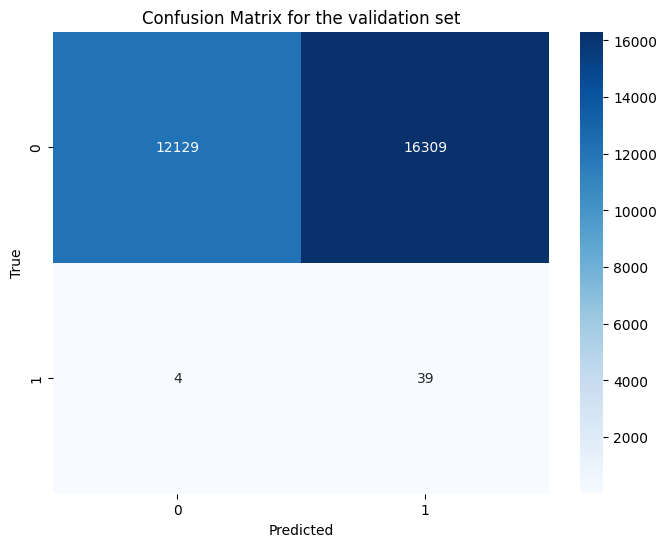

In [ ]:
C_M_val(y_val,predict_m(shallow_nn_model_b, X_val))


In [ ]:
plot_ROC_C(y_val, shallow_nn_model_b.predict(X_val).flatten().astype(float))


Hyperameter tunning using kerasClassifier Wrapper.

In [ ]:

# Define a function to create the shallow neural network model
def create_shallow_nn(optimizer, activation):
    shallow_nn = Sequential()
    shallow_nn.add(InputLayer((X_train_b.shape[1],)))
    shallow_nn.add(Dense(5, activation=activation))
    shallow_nn.add(BatchNormalization())
    shallow_nn.add(Dense(1, activation='sigmoid'))

    shallow_nn.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return shallow_nn

# Create a KerasClassifier based on your function
shallow_nn_model = KerasClassifier(build_fn=create_shallow_nn, epochs=10, batch_size=16, verbose=2)

# Define the parameter grid to search through
param_grid = {
    'optimizer': ['adam', 'sgd'],
    'activation': ['relu', 'tanh']
}

# Create a scorer for F1-score
f1_scorer = make_scorer(f1_score, average='binary')
checkpoint =ModelCheckpoint('best_model.h5', save_best_only=True)
# Create the GridSearchCV object
grid = GridSearchCV(estimator=shallow_nn_model, param_grid=param_grid, scoring=f1_scorer, cv=3)
grid_result = grid.fit(X_train_b, y_train_b, validation_data=(X_val_b, y_val_b), callbacks=[checkpoint])

# Print the best results
print("Best F1-score: %f using %s" % (grid_result.best_score_, grid_result.best_params_))


<ipython-input-48-681e5af3583f>:13: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  shallow_nn_model = KerasClassifier(build_fn=create_shallow_nn, epochs=10, batch_size=16, verbose=2)


Epoch 1/10
33/33 - 2s - loss: 0.7091 - accuracy: 0.5916 - val_loss: 0.6146 - val_accuracy: 0.6768 - 2s/epoch - 58ms/step
Epoch 2/10
33/33 - 0s - loss: 0.5880 - accuracy: 0.7252 - val_loss: 0.4827 - val_accuracy: 0.7778 - 200ms/epoch - 6ms/step
Epoch 3/10
33/33 - 0s - loss: 0.5255 - accuracy: 0.7824 - val_loss: 0.4193 - val_accuracy: 0.8182 - 218ms/epoch - 7ms/step
Epoch 4/10
33/33 - 0s - loss: 0.4676 - accuracy: 0.8244 - val_loss: 0.3740 - val_accuracy: 0.8586 - 181ms/epoch - 5ms/step
Epoch 5/10
33/33 - 0s - loss: 0.4177 - accuracy: 0.8492 - val_loss: 0.3358 - val_accuracy: 0.8990 - 188ms/epoch - 6ms/step
Epoch 6/10
33/33 - 0s - loss: 0.3974 - accuracy: 0.8588 - val_loss: 0.3106 - val_accuracy: 0.9192 - 168ms/epoch - 5ms/step
Epoch 7/10
33/33 - 0s - loss: 0.3829 - accuracy: 0.8798 - val_loss: 0.2919 - val_accuracy: 0.9293 - 161ms/epoch - 5ms/step
Epoch 8/10
33/33 - 0s - loss: 0.3536 - accuracy: 0.8721 - val_loss: 0.2725 - val_accuracy: 0.9293 - 173ms/epoch - 5ms/step
Epoch 9/10
33/33 -

In [ ]:

# Loading the best model from the saved file
best_model = load_model('best_model.h5')


# Generating a classification report
report = classification_report(y_val_b, (best_model.predict(X_val_b)> 0.5).astype(int), target_names=['Not Fraud', 'Fraud'])

print(report)


4/4 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

   Not Fraud       0.92      1.00      0.96        45
       Fraud       1.00      0.93      0.96        54

    accuracy                           0.96        99
   macro avg       0.96      0.96      0.96        99
weighted avg       0.96      0.96      0.96        99



4/4 [==============================] - 0s 2ms/step


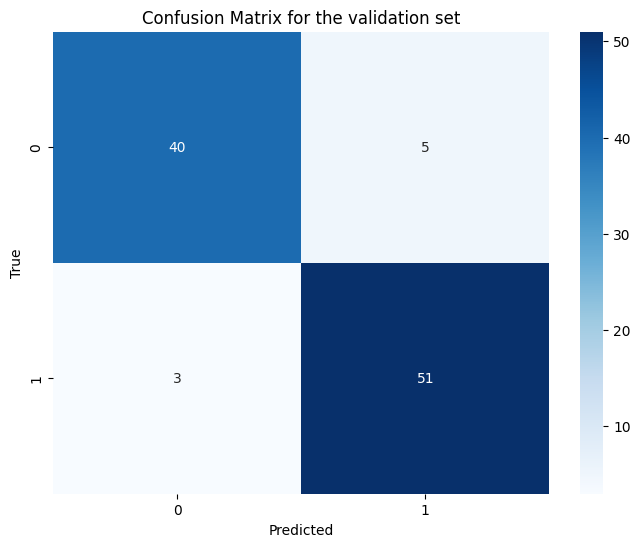

4/4 [==============================] - 0s 3ms/step


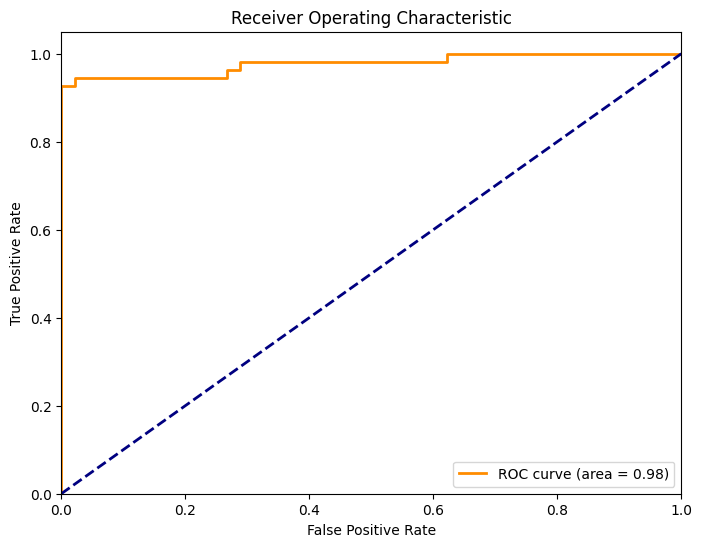

In [ ]:
C_M_val(y_val_b,predict_m(best_model, X_val_b))
plot_ROC_C(y_val_b, best_model.predict(X_val_b).flatten().astype(float))

RandomForestClassifier

In [ ]:
rf_model = random_forest(50,-1,X_train_b, y_train_b, X_val_b, y_val_b)


Classification Report for Validation Data:
              precision    recall  f1-score   support

   Not Fraud       0.94      1.00      0.97        45
       Fraud       1.00      0.94      0.97        54

    accuracy                           0.97        99
   macro avg       0.97      0.97      0.97        99
weighted avg       0.97      0.97      0.97        99



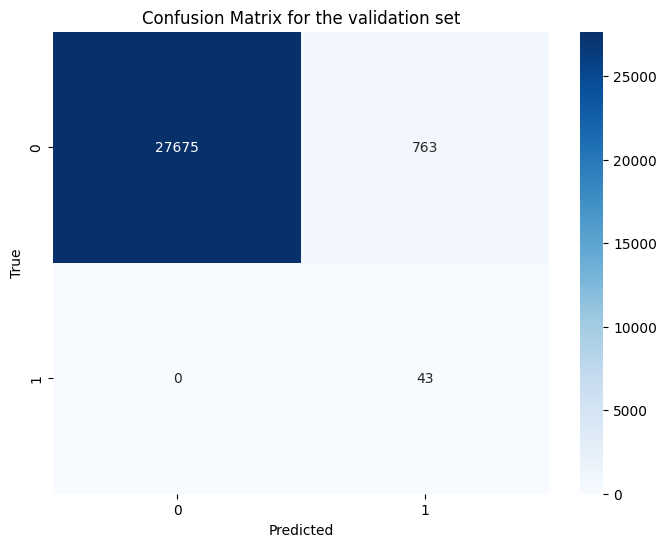

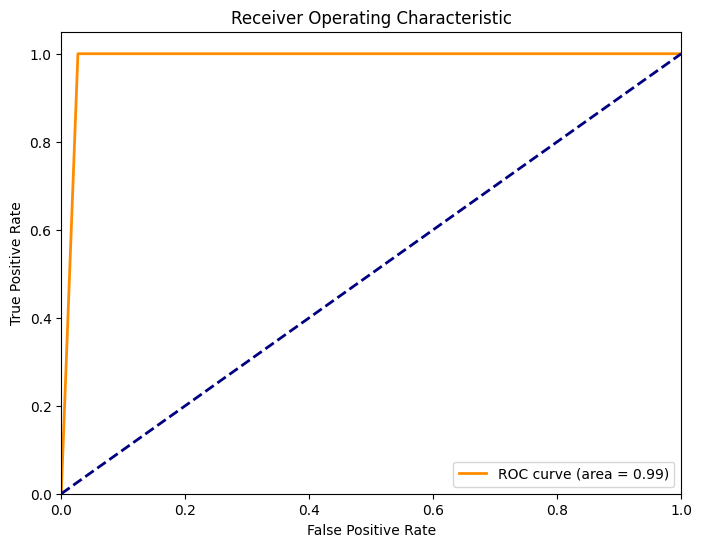

In [ ]:
C_M_val(y_val,predict_m(rf_model, X_val))
plot_ROC_C(y_val, rf_model.predict(X_val).flatten().astype(float))


GradientBoostingClassifier on the balanced data

In [ ]:
g_b_c_model= G_B_C(50,1.0, 1, X_train_b, y_train_b)


              precision    recall  f1-score   support

   Not Fraud       1.00      0.95      0.97     28438
       Fraud       0.03      0.98      0.05        43

    accuracy                           0.95     28481
   macro avg       0.51      0.96      0.51     28481
weighted avg       1.00      0.95      0.97     28481



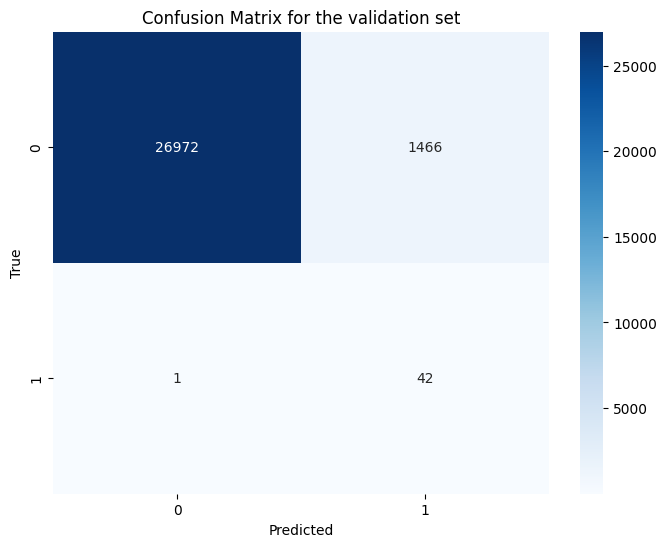

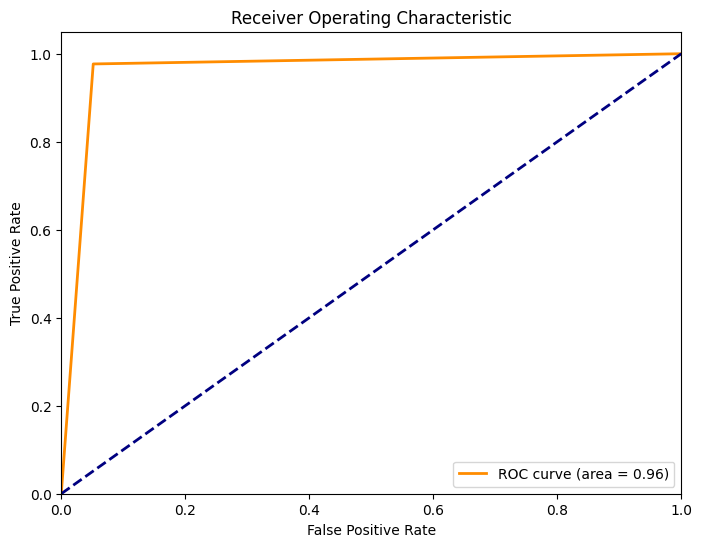

In [ ]:
C_M_val(y_val,predict_m(g_b_c_model, X_val))
plot_ROC_C(y_val, g_b_c_model.predict(X_val).flatten().astype(float))


Support Vector Classifier on the balanced data

In [ ]:
S_V_C_model = S_V_C(X_train_b,y_train_b)


              precision    recall  f1-score   support

   Not Fraud       1.00      0.97      0.99     28438
       Fraud       0.05      0.91      0.09        43

    accuracy                           0.97     28481
   macro avg       0.52      0.94      0.54     28481
weighted avg       1.00      0.97      0.98     28481



/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


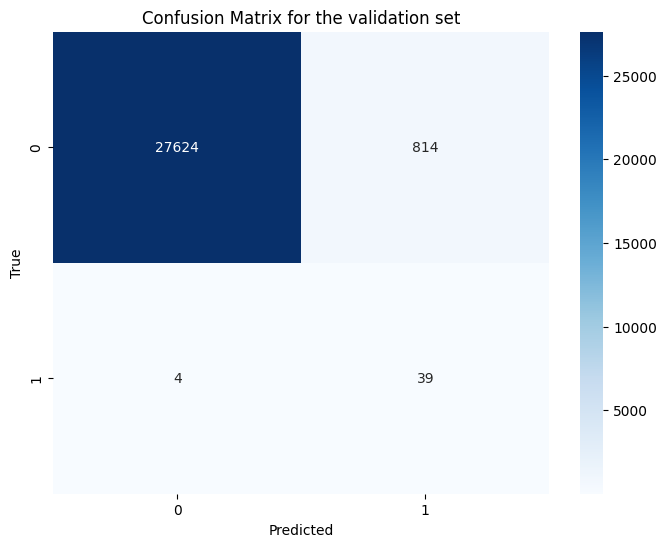

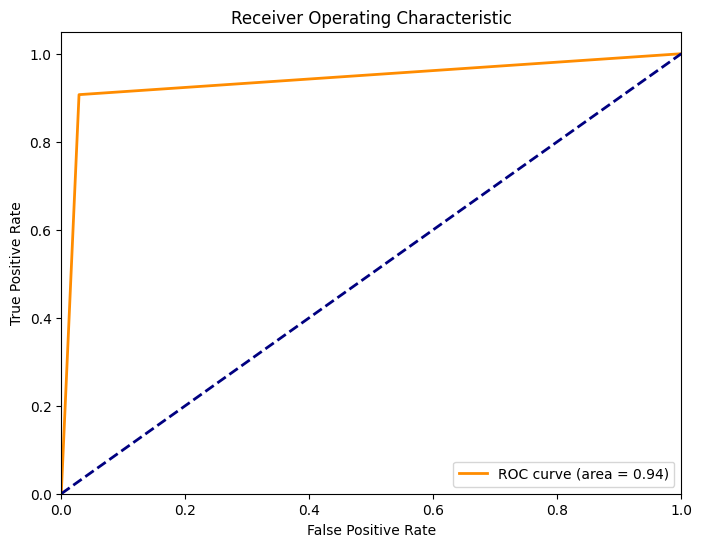

In [ ]:
C_M_val(y_val,predict_m(S_V_C_model, X_val))
plot_ROC_C(y_val, S_V_C_model.predict(X_val).flatten().astype(float))


**The best model is the neural Network, we will create a pipeline for the model**

In [ ]:
def Robust_Scaler_M(df,coloumns_to_scale):
    new_df = df.copy()
    rc = RobustScaler()
    for c in coloumns_to_scale:
      new_df[c]= rc.fit_transform(new_df[c].to_numpy().reshape(-1,1))

    return new_df

#coloumns_to_scale =['Time','Amount']
#Call this fucntion Robust_Scaler_M(df,coloumns_to_scale)




def dataframe_b(unbalanced_df):
    not_frauds = new_df.query('Class == 0')
    frauds = new_df.query('Class == 1')
    not_frauds['Class'].value_counts(), frauds['Class'].value_counts()
    balanced_dataframe= unbalanced_df.sample(len(frauds), random_state=33)
    balanced_dataframe = unbalanced_df.sample(frac=1, random_state=1)
    return balanced_dataframe

# Call this fucntion by balanced_dataframe = dataframe_b(new_df)




def t_t_s_skl(preprocessed_df, train_test_size, val_size):
    X = preprocessed_df.drop(columns=['Class'])
    y = preprocessed_df['Class']

    X_train_1, X_temp_1, y_train_1, y_temp_1 = train_test_split(X, y, test_size=train_test_size, random_state=42)
    X_test_1, X_val_1, y_test_1, y_val_1 = train_test_split(X_temp_1, y_temp_1, test_size=val_size, random_state=42)

    print("Shapes:")
    print("X_train:", X_train_1.shape)
    print("X_temp:", X_temp_1.shape)
    print("y_train:", y_train_1.shape)
    print("y_temp:", y_temp_1.shape)
    print("X_test:", X_test_1.shape)
    print("X_val:", X_val_1.shape)
    print("y_test:", y_test_1.shape)
    print("y_val:", y_val_1.shape)

    return X_train_1, X_test_1, X_val_1, y_train_1, y_test_1, y_val_1

# Call this function
#X_train, X_test, X_val, y_train, y_test, y_val = t_t_s_skl(new_df, 0.2, 0.5)




# function to create the shallow neural network model
def create_shallow_nn(optimizer, activation):
    shallow_nn = Sequential()
    shallow_nn.add(InputLayer((X_train_b.shape[1],)))
    shallow_nn.add(Dense(5, activation=activation))
    shallow_nn.add(BatchNormalization())
    shallow_nn.add(Dense(1, activation='sigmoid'))

    shallow_nn.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return shallow_nn

# Create a KerasClassifier based on the function
shallow_nn_model = KerasClassifier(build_fn=create_shallow_nn, epochs=10, batch_size=16, verbose=2)

# Defining the parameter grid to search through
param_grid = {
    'optimizer': ['adam', 'sgd'],
    'activation': ['relu', 'tanh']
}

# Creating a scorer for F1-score
f1_scorer = make_scorer(f1_score, average='binary')
checkpoint =ModelCheckpoint('best_model.h5', save_best_only=True)
# Create the GridSearchCV object
grid = GridSearchCV(estimator=shallow_nn_model, param_grid=param_grid, scoring=f1_scorer, cv=3)
grid_result = grid.fit(X_train_b, y_train_b, validation_data=(X_val_b, y_val_b), callbacks=[checkpoint])

# Print the best results
print("Best F1-score: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

